# Credit Card Fraud Detection

As we are moving towards the digital world — cybersecurity is becoming a crucial part of our life. When we talk about security in digital life then the main challenge is to find the abnormal activity. When we make any transaction while purchasing any product online — a good amount of people prefer credit cards. The credit limit in credit cards sometimes helps us me making purchases even if we don’t have the amount at that time. but, on the other hand, these features are misused by cyber attackers.

To tackle this problem we need a system that can abort the transaction if it finds fishy. Here, comes the need for a system that can track the pattern of all the transactions and if any pattern is abnormal then the transaction should be aborted. Today, we have many machine learning algorithms that can help us classify abnormal transactions. The only requirement is the past data and the suitable algorithm that can fit our data in a better form.

I will help you in the complete end-to-end model training process — finally, you will get the best model that can classify the transaction into normal and abnormal types.

Dataset :- https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
#importing libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import seaborn as sns #statistical graphics

from sklearn.linear_model import LogisticRegression #predict the propability of a categorical dependent variable
from sklearn.model_selection import train_test_split #measure the accuracy of the model
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

In [2]:
#load the dataset 2 pandas data frame for manupulating the data
data = pd.read_csv('creditcard.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "data"
credit_card_data = data.where((pd.notnull(data)), '')

#lets check the shape of the dataset
credit_card_data.shape

(284807, 31)

In [3]:
#printing the dataset
print(credit_card_data)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


### Printing the head of the dataset to have a look at the dataframe

In [4]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
credit_card_data.head(10)

#v1, v2,....,v28 => These r sm features abt each particular transaction but dey cant give details abt it
#coz cc details r very sensitive details & cant expose those details
#so this dataset provider converted all the features through "Principle Component Analysis method" in2 numerical values 
#& v gonna use these numerical values for our analysis & prediction 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Printing the tail of the dataset to have a look at the dataframe

In [5]:
#last 10 rows of the dataset
credit_card_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#data preprocessing 2 check whether if there r any empty values
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Counterplot
Showing the total count of fraud and legit transactions in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


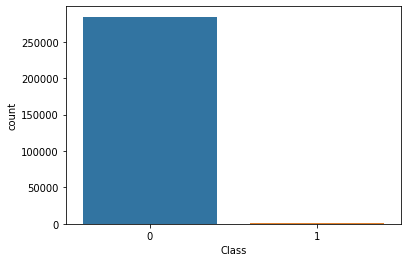

In [8]:
#lets plot the data 
sns.countplot(credit_card_data['Class'])
#this is a imbalanced data

#### Checking Number of Legit and Fraud Transactions

In [9]:
#here 'class' is the dependent variable & remaining (v1,v2,...v28) r independent variable
#lets check how many values r there in dependent variable 'class'
#v can c how many examples r there for class 1 & 0
pd.value_counts(credit_card_data['Class'])

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Legit Transaction

1 --> Fraudulent transaction

In [10]:
#separating the data in2 legit & fraud for analysis
#assigning legit as 0
legit = credit_card_data[credit_card_data.Class == 0]

#assigning fraud as 1
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
#printing the shape of legit data
print(legit.shape)

#printing the shape of fraud data
print(fraud.shape)

(284315, 31)
(492, 31)


### Having a look at details of the data

In [12]:
#statistical measures of the legit data
#this will take Amount colunm & do sm statistical measures abt this column
legit.Amount.describe()

#here 25%, 50% & 75% r not percentages, dey r percentiles
#which means 25% of the transactions < 5.65$
#50% of transactions < 22$
#75% of transactions < 77.05$

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
#statistical measures of the fraud data
#this will take Amount colunm & do sm statistical measures abt this column
fraud.Amount.describe()

#here 25%, 50% & 75% r not percentages, dey r percentiles
#which means 25% of the transactions < 1$
#50% of transactions < 9.25$
#75% of transactions < 105.89$

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

#there is a huge difference in mean b/w legit & fraud transaction
#this difference is very imp for us & this is how our ML Algo can find the difference b/w / it can predict b/w legit & fraud transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [15]:
#v gonna take few sample legit transactions = fraud transactions
#as it'll b very gud dataset in that case 
#the distribution is equal & v can make better predictions 
#v r gonna take random sample of whole dataset of 492
legit_sample = legit.sample(n = 492)

Concatenating two DataFrames

In [16]:
#v'll create new dataframe n name it as "new_dataset"
#this will join 2 dataframes 
#if v mention axis = 0 ==> thn this dataframe should b added 1 by 1
#if v mention ais = 0 --> Thn all the 492 values will b added below this legit_sample
#if v mention axis = 1 --> Thn the values will b added column wise which v dont want

#axis = 0 --> Row
#axis = 1 --> Column
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
new_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
242299,151428.0,0.163276,1.077162,-2.023793,-0.419644,1.031681,-0.969836,1.098141,0.187119,-0.786587,-0.971827,0.896488,0.475736,-0.487159,-0.292045,-1.367653,0.128153,0.701148,0.412647,-0.182127,-0.220033,0.252342,0.617523,0.050038,0.654962,-0.334098,0.497172,-0.167527,-0.050901,46.40,0
96010,65565.0,-0.593934,0.516204,1.188777,0.481929,0.264557,-0.247319,0.462989,0.154997,-0.679918,0.091953,1.347066,-0.178010,-1.738242,0.932197,0.964378,-0.288054,0.121496,-0.305537,1.130379,-0.090764,-0.298262,-0.996941,0.438849,-0.071106,-1.042078,-0.080369,0.014606,0.154539,24.90,0
42776,41240.0,-1.988650,0.878713,1.567161,-1.720898,0.044228,0.111168,0.509244,-2.911339,2.697826,0.644744,-0.691956,0.446423,0.547875,-1.661425,0.643487,-1.237146,-0.535251,0.225580,1.097199,-0.426181,1.617258,0.443277,-0.385759,-0.092065,-0.005972,-0.796037,-1.910054,-0.505707,35.90,0
16571,27933.0,0.166634,0.556358,0.626835,0.709081,0.815004,1.923556,-0.300470,-0.246600,-0.612860,-0.066618,1.971121,1.097669,-0.065216,0.791485,1.555510,-1.174953,0.671388,-1.384662,-0.963602,-0.280509,0.972587,0.495904,-0.105305,-1.327286,0.493445,-0.085173,0.266552,0.212007,9.99,0
220384,142144.0,0.107597,0.777928,-0.652158,-0.753002,1.087427,-0.276476,0.702058,0.187597,0.035973,-0.603494,0.181077,-0.671294,-1.986181,-0.452126,-0.678464,0.779456,0.033648,0.704113,0.278374,-0.065773,-0.344080,-0.988959,0.052647,-0.067714,-0.443971,0.135002,0.202556,0.065379,4.99,0
84326,60256.0,1.240041,-0.010630,0.228240,-0.318713,-0.151554,-0.155618,-0.165043,0.031716,-0.094141,-0.084738,1.525830,1.243912,0.747087,0.302764,0.635563,0.223099,-0.435135,-0.429596,0.121955,-0.038530,-0.045430,-0.075163,0.015920,-0.216539,0.205709,0.990593,-0.066741,-0.012037,0.80,0
128885,78874.0,-0.414292,0.865582,2.742625,2.196344,-0.415723,-0.092475,0.281526,-0.062593,-0.192216,0.454623,-0.631591,-0.112958,-0.292879,-0.668073,-0.608546,0.250291,-0.342517,-0.200133,-0.901320,-0.091205,0.064008,0.427741,0.053489,0.898382,-0.928103,-0.269299,-0.088458,-0.006919,3.78,0
115042,73726.0,-0.446917,0.415295,2.454872,0.192309,-0.773964,-0.004760,-0.127432,0.346139,0.221635,-0.492801,0.805820,0.315995,-1.206823,-0.091531,-0.614898,0.242847,-0.270262,0.496388,0.343765,-0.097799,0.042579,0.184342,-0.086671,0.536183,-0.301401,0.249199,0.057361,0.057136,9.67,0
155891,106718.0,1.923345,-0.299254,-0.119863,0.460840,-0.691863,-0.456562,-0.706354,0.036874,2.496660,-0.410264,1.877850,-1.809752,0.601881,1.921222,-0.218531,0.354209,-0.029282,0.791174,-0.160634,-0.332607,-0.211567,-0.324132,0.373479,-0.129871,-0.485064,-0.979943,0.023543,-0.043619,11.27,0
241141,150902.0,2.014483,-2.100571,-1.914043,-2.509013,0.691244,3.741858,-1.844702,0.925875,-1.148980,1.476963,-0.163496,-0.620176,0.447195,-0.388412,0.489723,-0.308544,0.293564,-0.279616,-0.306080,-0.104058,-0.331773,-0.867399,0.397954,0.638911,-0.615443,-0.476130,0.034813,-0.019906,135.90,0


In [18]:
#last 10 rows of the dataset
new_dataset.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,2.688670,-1.475145,-0.050468,0.113500,0.984344,0.363969,-0.674357,0.327464,0.091470,1.307941,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,-2.516628,0.874052,-2.513104,0.021575,-3.565119,0.461153,-2.015713,-1.731413,-0.465815,0.527620,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,1.334414,1.032016,-0.722023,-1.533240,0.334119,0.297479,-0.429392,-0.824644,0.489668,0.873344,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,1.338318,-0.329759,-0.363591,-1.824839,-0.229679,1.842347,1.194212,0.037467,0.423099,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,-4.390842,1.241958,-3.910522,-1.225636,-4.697997,0.676108,-2.077066,-2.683521,-0.525949,0.422342,0.650196,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
#here 'class' is the dependent variable & remaining (v1,v2,...v28) r independent variable
#lets check how many values r there in dependent variable 'class'
#v can c how many examples r there for class 1 & 0
pd.value_counts(new_dataset['Class'])

1    492
0    492
Name: Class, dtype: int64

In [20]:
#compare the values for both transactions
new_dataset.groupby('Class').mean()

#there is a huge difference in mean b/w legit & fraud transaction
#this difference is very imp for us & this is how our ML Algo can find the difference b/w / it can predict b/w legit & fraud transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95135.138211,0.084683,0.055101,-0.034300,-0.016086,-0.022977,-0.083825,0.067578,0.026829,-0.003908,0.024949,0.027796,0.045665,-0.003355,-0.026657,0.002876,-0.006013,0.035064,0.021195,0.022630,0.042835,-0.026672,-0.035295,0.019897,-0.003612,-0.000953,-0.004179,-0.018458,-0.006338,86.497541
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [21]:
#assigning features(time, v1, v2, ........, v28 & amount) as X
#v r gonna drop the class column 
#as v r droping the column v need 2 mention axis = 1
X = new_dataset.drop(columns = 'Class', axis = 1)

#assigning targets(0 & 1) as Y
Y = new_dataset['Class']

In [22]:
print(X) #printing the features(time, v1, v2, ........, v28 & amount)
print("---------------------------------------------------------------------------------------------------------------------------")
print(Y) #printing the targets(0 & 1)

            Time        V1        V2  ...       V27       V28  Amount
242299  151428.0  0.163276  1.077162  ... -0.167527 -0.050901   46.40
96010    65565.0 -0.593934  0.516204  ...  0.014606  0.154539   24.90
42776    41240.0 -1.988650  0.878713  ... -1.910054 -0.505707   35.90
16571    27933.0  0.166634  0.556358  ...  0.266552  0.212007    9.99
220384  142144.0  0.107597  0.777928  ...  0.202556  0.065379    4.99
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]
---------------------------------------------------------------------------------------------------------------------------
242299    0

## Dividing data into train and test data using sklearn's train_test_split()

In [23]:
#spliting the dataset in2 Training & Testing

#test size --> 2 specify the percentage of test data needed ==> 0.2 ==> 20%

#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym

#stratifying it based on the y, so that the data is split in the crt way
#stratify --> for crt distribution of data as of the original data(2 split the data correctly as of the original data)
#if i dont mention stratify = y, the distribution of 0 & 1 can b very different in the training data & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [24]:
#lets c how many examples r there for each cases
#checking dimensions of Features
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
#lets c how many examples r there for each cases
#checking dimensions of Targets
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


## Our data is ready to be applied a machine learning algorithm

# ***Logistic Regression***

### Implementing Logistic Regression without scaling

In [26]:
#loading the logistic regression 2 the variable "model"
#training the Logistic Regression Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the logistic regression model, so the model is trained with the data
model = LogisticRegression().fit(X_train, Y_train)

## **Evaluation of the model**

## Predicting seen data with our Logistic Regression ML model

In [27]:
#prediction on train_data
X_train_prediction = model.predict(X_train)
X_train_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

## Predicting unseen data with our Logistic Regression ML model

In [28]:
#prediction on test_data
X_test_prediction = model.predict(X_test)
X_test_prediction

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

## Checking Accuracy of Logistic Regression ML model with training data and testing data

In [29]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
#prediction on train_data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9479034307496823
Accuracy score on Test Data :  0.9187817258883249


## Logistic Regression ML model Score

In [31]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
model.score(X_train, Y_train)

0.9479034307496823

In [32]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
model.score(X_test, Y_test)

0.9187817258883249

Lets Cross Validate and Check how the model performs.

In [33]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(model, X, Y, cv = 5))

[0.94416244 0.93401015 0.88832487 0.93908629 0.90816327]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Making a Predictive System

In [34]:
#v r predicting by giving the input 
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)
#change input_data 2 numpy_array 2 make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

#reshape the array as v r predicting the output for 1 instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#prediction
prediction = model.predict(input_data_reshaped)
print(prediction) #returns a list with element [0] if Malignant else [1] for Benign

if (prediction[0] == 0):
  print('It is Legit Transaction')
else:
  print("It is Fraud Transaction")

(0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62)
[0]
It is Legit Transaction


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Summary
So this is how we can build a Credit card fraud detection model using Machine Learning and the Python programming language. I hope you liked this project on how to build a credit card fraud detection model with Machine Learning.

# Saving the trained model

In [35]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [39]:
#save the model trained in the file "trained_model.sav" to a new file called "creditcard_trained_model.pkl"
filename = 'creditcard_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [37]:
#loading the saved model
loaded_model = pickle.load(open('creditcard_trained_model.sav', 'rb'))

In [38]:
#v r predicting by giving the input 
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)
#change input_data 2 numpy_array 2 make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

#reshape the array as v r predicting the output for 1 instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#prediction
prediction = model.predict(input_data_reshaped)
print(prediction) #returns a list with element [0] if Malignant else [1] for Benign

if (prediction[0] == 0):
  print('It is Legit Transaction')
else:
  print("It is Fraud Transaction")

(0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62)
[0]
It is Legit Transaction


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
